In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, RandomizedSearchCV

## Load Data

In [3]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [44]:
df.shape

(5110, 12)

## Data exploration 

In [45]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

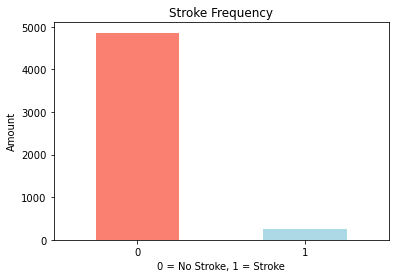

In [10]:
df['stroke'].value_counts().plot(kind='bar', color=['salmon', 'lightblue']);

plt.title('Stroke Frequency')
plt.ylabel('Amount')
plt.xlabel('0 = No Stroke, 1 = Stroke')
plt.xticks(rotation=0);

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [8]:
# Missing values
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

### Stoke frequency according to sex

In [9]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [10]:
pd.crosstab(df.stroke, df.gender)

gender,Female,Male,Other
stroke,,,
0,2853,2007,1
1,141,108,0


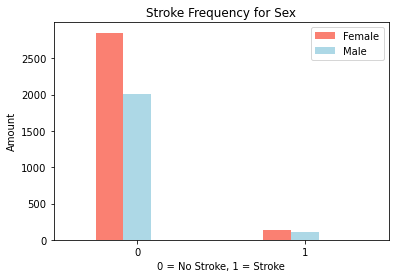

In [9]:
pd.crosstab(df.stroke, df.gender).plot(kind='bar', color=['salmon', 'lightblue']);

plt.title('Stroke Frequency for Sex')
plt.xlabel('0 = No Stroke, 1 = Stroke')
plt.ylabel('Amount')
plt.legend(['Female', 'Male'])
plt.xticks(rotation=0);

### Stroke and average bmi

In [186]:
df.bmi[df.stroke==1].mean()

30.47129186602871

In [187]:
df.bmi[df.stroke==1].std()

6.3294518200464465

### Stroke and mean age

In [7]:
df.age[df.stroke==1].mean()

67.72819277108434

In [8]:
df.age[df.stroke==1].std()

12.727419360404241

### Stroke and heart disease

In [15]:
pd.crosstab(df.stroke, df.heart_disease)

heart_disease,0,1
stroke,,
0,4632,229
1,202,47


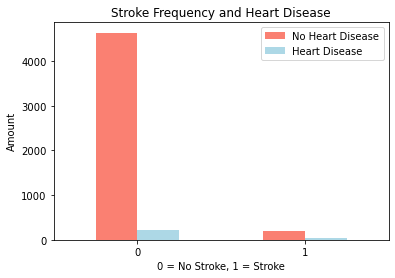

In [10]:
pd.crosstab(df.stroke, df.heart_disease).plot(kind='bar', color=['salmon', 'lightblue']);

plt.title('Stroke Frequency and Heart Disease')
plt.xlabel('0 = No Stroke, 1 = Stroke')
plt.ylabel('Amount')
plt.legend(['No Heart Disease', 'Heart Disease'])
plt.xticks(rotation=0);

### Stroke and hypertension

In [18]:
pd.crosstab(df.stroke, df.hypertension)

hypertension,0,1
stroke,,
0,4429,432
1,183,66


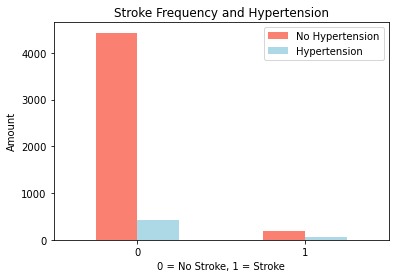

In [11]:
pd.crosstab(df.stroke, df.hypertension).plot(kind='bar', color=['salmon', 'lightblue']);

plt.title('Stroke Frequency and Hypertension')
plt.xlabel('0 = No Stroke, 1 = Stroke')
plt.ylabel('Amount')
plt.legend(['No Hypertension', 'Hypertension'])
plt.xticks(rotation=0);

### Stroke and resident type

In [19]:
pd.crosstab(df.stroke,df.Residence_type)

Residence_type,Rural,Urban
stroke,,
0,2400,2461
1,114,135


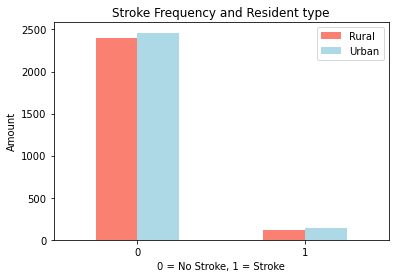

In [12]:
pd.crosstab(df.stroke,df.Residence_type).plot(kind='bar', color=['salmon', 'lightblue']);

plt.title('Stroke Frequency and Resident type')
plt.xlabel('0 = No Stroke, 1 = Stroke')
plt.ylabel('Amount')
plt.legend(['Rural', 'Urban'])
plt.xticks(rotation=0);

### Stroke and smoking status

In [20]:
pd.crosstab(df.stroke, df.smoking_status)

smoking_status,Unknown,formerly smoked,never smoked,smokes
stroke,,,,
0,1497,815,1802,747
1,47,70,90,42


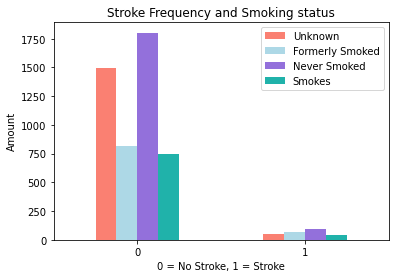

In [13]:
pd.crosstab(df.stroke, df.smoking_status).plot(kind='bar', color=['salmon', 'lightblue','mediumpurple','lightseagreen']);

plt.title('Stroke Frequency and Smoking status')
plt.xlabel('0 = No Stroke, 1 = Stroke')
plt.ylabel('Amount')
plt.legend(['Unknown', 'Formerly Smoked', 'Never Smoked', 'Smokes'])
plt.xticks(rotation=0);

### Stroke and average glucose level

In [22]:
df.avg_glucose_level[df.stroke==1].mean()

132.54473895582322

In [188]:
df.avg_glucose_level[df.stroke==1].std()

61.92105558068223

### Stroke and work_type

In [26]:
pd.crosstab(df.stroke, df.work_type)

work_type,Govt_job,Never_worked,Private,Self-employed,children
stroke,,,,,
0,624,22,2776,754,685
1,33,0,149,65,2


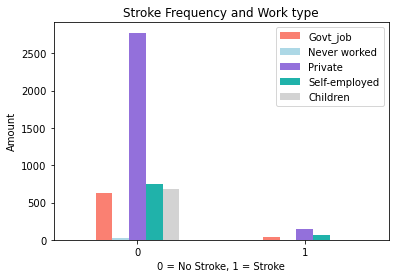

In [4]:
pd.crosstab(df.stroke, df.work_type).plot(kind='bar', color=['salmon', 'lightblue','mediumpurple','lightseagreen', 'lightgray']);

plt.title('Stroke Frequency and Work type')
plt.xlabel('0 = No Stroke, 1 = Stroke')
plt.ylabel('Amount')
plt.legend(['Govt_job', 'Never worked', 'Private', 'Self-employed', 'Children'])
plt.xticks(rotation=0);

### Stroke and life status

In [24]:
pd.crosstab(df.stroke, df.ever_married)

ever_married,No,Yes
stroke,,
0,1728,3133
1,29,220


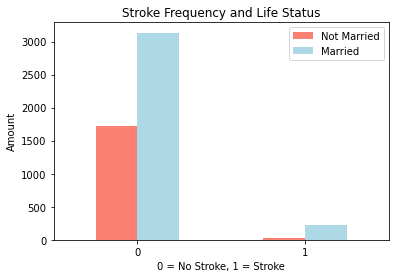

In [5]:
pd.crosstab(df.stroke, df.ever_married).plot(kind='bar', color=['salmon', 'lightblue']);

plt.title('Stroke Frequency and Life Status')
plt.xlabel('0 = No Stroke, 1 = Stroke')
plt.ylabel('Amount')
plt.legend(['Not Married', 'Married'])
plt.xticks(rotation=0);

### Corellation matrix

In [140]:
df.corr()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
id,1.000000,0.003538,0.003550,-0.001296,0.001092,0.003084,0.006388
age,0.003538,1.000000,0.276398,0.263796,0.238171,0.333398,0.245257
hypertension,0.003550,0.276398,1.000000,0.108306,0.174474,0.167811,0.127904
heart_disease,-0.001296,0.263796,0.108306,1.000000,0.161857,0.041357,0.134914
avg_glucose_level,0.001092,0.238171,0.174474,0.161857,1.000000,0.175502,0.131945
bmi,0.003084,0.333398,0.167811,0.041357,0.175502,1.000000,0.042374
stroke,0.006388,0.245257,0.127904,0.134914,0.131945,0.042374,1.000000


## Data preprocessing

In [129]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [130]:
# Drop id column
df.drop('id', axis=1, inplace=True)
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [131]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [132]:
#Replace gender and married status with 0 and 1 values
df.gender = np.where(df.gender == 'Female', 1, 0)

df.ever_married = np.where(df.ever_married == 'Yes', 1, 0)

In [133]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,0,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


In [134]:
# Convert objects to categories
for label, content in df.items():
    if pd.api.types.is_string_dtype(content):
        df[label] = content.astype('category')

In [135]:
df.dtypes

gender                  int32
age                   float64
hypertension            int64
heart_disease           int64
ever_married            int32
work_type            category
Residence_type       category
avg_glucose_level     float64
bmi                   float64
smoking_status       category
stroke                  int64
dtype: object

In [136]:
# Turn categorical variables into numbers
for label, content in df.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Turn categories into numbers 
        df[label] = pd.Categorical(content).codes

In [137]:
df.dtypes

gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type               int8
Residence_type          int8
avg_glucose_level    float64
bmi                  float64
smoking_status          int8
stroke                 int64
dtype: object

In [138]:
df.smoking_status.value_counts()

2    1892
0    1544
1     885
3     789
Name: smoking_status, dtype: int64

In [139]:
# Replace unknown smoking status with null value
df.smoking_status = np.where((df.smoking_status == 0), None ,df.smoking_status)

In [140]:
df.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [141]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,2,1,228.69,36.6,1,1
1,1,61.0,0,0,1,3,0,202.21,NaN,2,1
2,0,80.0,0,1,1,2,0,105.92,32.5,2,1
3,1,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1,79.0,1,0,1,3,0,174.12,24.0,2,1


### Dataframe A => Drop columns with missing values

In [142]:
df_a = df.copy()
df_a.drop(['bmi', 'smoking_status'], axis=1, inplace=True)
df_a.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,stroke
0,0,67.0,0,1,1,2,1,228.69,1
1,1,61.0,0,0,1,3,0,202.21,1
2,0,80.0,0,1,1,2,0,105.92,1
3,1,49.0,0,0,1,2,1,171.23,1
4,1,79.0,1,0,1,3,0,174.12,1


In [155]:
df_a.to_pickle('./datasets/df_a.pkl')

### Dataframe B => Fill BMI missing values with mean

In [143]:
df_b = df.copy()
df_b.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,2,1,228.69,36.6,1,1
1,1,61.0,0,0,1,3,0,202.21,NaN,2,1
2,0,80.0,0,1,1,2,0,105.92,32.5,2,1
3,1,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1,79.0,1,0,1,3,0,174.12,24.0,2,1


In [144]:
df_b.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                   201
smoking_status       1544
stroke                  0
dtype: int64

In [145]:
df_b['bmi'].fillna(df_b['bmi'].mean(), inplace=True)
df_b.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,1,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,0,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,1,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,1,79.0,1,0,1,3,0,174.12,24.000000,2,1


In [146]:
df_b.bmi.mean()

28.89323691179472

In [147]:
df_b.dtypes

gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type               int8
Residence_type          int8
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [268]:
df_b.to_pickle('./datasets/df_b.pkl')

### Dataframe C => Fill BMI missing values using Linear Regression

In [148]:
df_c = df.copy()
df_c.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,1,2,1,228.69,36.6,1,1
1,1,61.0,0,0,1,3,0,202.21,NaN,2,1
2,0,80.0,0,1,1,2,0,105.92,32.5,2,1
3,1,49.0,0,0,1,2,1,171.23,34.4,3,1
4,1,79.0,1,0,1,3,0,174.12,24.0,2,1


In [149]:
df_c.drop('smoking_status', axis=1, inplace=True)
df_c.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,0,67.0,0,1,1,2,1,228.69,36.6,1
1,1,61.0,0,0,1,3,0,202.21,NaN,1
2,0,80.0,0,1,1,2,0,105.92,32.5,1
3,1,49.0,0,0,1,2,1,171.23,34.4,1
4,1,79.0,1,0,1,3,0,174.12,24.0,1


In [150]:
df_c.corr()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
gender,1.000000,0.027924,-0.021143,-0.085617,0.030483,-0.056532,0.006340,-0.054902,0.026360,-0.009027
age,0.027924,1.000000,0.276398,0.263796,0.679125,-0.361642,0.014180,0.238171,0.333398,0.245257
hypertension,-0.021143,0.276398,1.000000,0.108306,0.164243,-0.051761,-0.007913,0.174474,0.167811,0.127904
heart_disease,-0.085617,0.263796,0.108306,1.000000,0.114644,-0.028023,0.003092,0.161857,0.041357,0.134914
ever_married,0.030483,0.679125,0.164243,0.114644,1.000000,-0.352722,0.006261,0.155068,0.341695,0.108340
work_type,-0.056532,-0.361642,-0.051761,-0.028023,-0.352722,1.000000,-0.007316,-0.050513,-0.304876,-0.032316
Residence_type,0.006340,0.014180,-0.007913,0.003092,0.006261,-0.007316,1.000000,-0.004946,-0.000122,0.015458
avg_glucose_level,-0.054902,0.238171,0.174474,0.161857,0.155068,-0.050513,-0.004946,1.000000,0.175502,0.131945
bmi,0.026360,0.333398,0.167811,0.041357,0.341695,-0.304876,-0.000122,0.175502,1.000000,0.042374
stroke,-0.009027,0.245257,0.127904,0.134914,0.108340,-0.032316,0.015458,0.131945,0.042374,1.000000


In [151]:
# Separate the Null values and consider as test_data
test_data = df_c[df_c['bmi'].isnull()]

In [152]:
# Drop the Null values and consider as train_data
df_c.dropna(inplace=True)
df_c.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,0,67.0,0,1,1,2,1,228.69,36.6,1
2,0,80.0,0,1,1,2,0,105.92,32.5,1
3,1,49.0,0,0,1,2,1,171.23,34.4,1
4,1,79.0,1,0,1,3,0,174.12,24.0,1
5,0,81.0,0,0,1,2,1,186.21,29.0,1


In [153]:
y_train = df_c['bmi']
y_train

0       36.6
2       32.5
3       34.4
4       24.0
5       29.0
        ... 
5104    18.6
5106    40.0
5107    30.6
5108    25.6
5109    26.2
Name: bmi, Length: 4909, dtype: float64

In [154]:
X_train = df_c.drop('bmi', axis=1)

In [155]:
X_train.shape

(4909, 9)

In [156]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [157]:
X_test = test_data.drop('bmi', axis=1)

In [158]:
X_test.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,stroke
1,1,61.0,0,0,1,3,0,202.21,1
8,1,59.0,0,0,1,2,0,76.15,1
13,0,78.0,0,1,1,2,1,219.84,1
19,0,57.0,0,1,0,0,1,217.08,1
27,0,58.0,0,0,1,2,0,189.84,1


In [159]:
y_pred = lr.predict(X_test)

In [160]:
y_pred.shape

(201,)

In [161]:
test_data.loc[test_data.bmi.isnull(), 'bmi'] = y_pred
test_data.head()

C:\Users\alex\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
1,1,61.0,0,0,1,3,0,202.21,30.046602,1
8,1,59.0,0,0,1,2,0,76.15,28.965773,1
13,0,78.0,0,1,1,2,1,219.84,31.003945,1
19,0,57.0,0,1,0,0,1,217.08,30.072605,1
27,0,58.0,0,0,1,2,0,189.84,30.930733,1


In [162]:
df_c.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,0,67.0,0,1,1,2,1,228.69,36.6,1
2,0,80.0,0,1,1,2,0,105.92,32.5,1
3,1,49.0,0,0,1,2,1,171.23,34.4,1
4,1,79.0,1,0,1,3,0,174.12,24.0,1
5,0,81.0,0,0,1,2,1,186.21,29.0,1


In [163]:
df_c = df_c.append(test_data)
df_c.sort_index(inplace=True)
df_c.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke
0,0,67.0,0,1,1,2,1,228.69,36.600000,1
1,1,61.0,0,0,1,3,0,202.21,30.046602,1
2,0,80.0,0,1,1,2,0,105.92,32.500000,1
3,1,49.0,0,0,1,2,1,171.23,34.400000,1
4,1,79.0,1,0,1,3,0,174.12,24.000000,1


In [222]:
df_c.to_pickle('./datasets/df_c.pkl')

### Dataframe D => Fill smoking status missing values using KNN 

In [164]:
df_d = df.copy()

In [165]:
df_d.drop('bmi', axis=1, inplace=True)
df_d.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,0,67.0,0,1,1,2,1,228.69,1,1
1,1,61.0,0,0,1,3,0,202.21,2,1
2,0,80.0,0,1,1,2,0,105.92,2,1
3,1,49.0,0,0,1,2,1,171.23,3,1
4,1,79.0,1,0,1,3,0,174.12,2,1


In [166]:
df_d.isna().sum()

gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
smoking_status       1544
stroke                  0
dtype: int64

In [167]:
df_d.dtypes

gender                 int32
age                  float64
hypertension           int64
heart_disease          int64
ever_married           int32
work_type               int8
Residence_type          int8
avg_glucose_level    float64
smoking_status        object
stroke                 int64
dtype: object

In [171]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

In [172]:
imputed = imputer.fit_transform(df_d)

In [175]:
df_imputed = pd.DataFrame(imputed, columns=df_d.columns)
df_imputed.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke
0,0.0,67.0,0.0,1.0,1.0,2.0,1.0,228.69,1.0,1.0
1,1.0,61.0,0.0,0.0,1.0,3.0,0.0,202.21,2.0,1.0
2,0.0,80.0,0.0,1.0,1.0,2.0,0.0,105.92,2.0,1.0
3,1.0,49.0,0.0,0.0,1.0,2.0,1.0,171.23,3.0,1.0
4,1.0,79.0,1.0,0.0,1.0,3.0,0.0,174.12,2.0,1.0


In [176]:
df_imputed.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
smoking_status       0
stroke               0
dtype: int64

In [294]:
df_imputed.to_pickle('./datasets/df_d.pkl')

### Dataframe E => LinearRegression and KNN together for the missing values

In [178]:
df_e = df.copy()
df_e.drop(['bmi', 'smoking_status'], axis=1, inplace=True)

In [179]:
df_e['bmi'] = df_c['bmi'].copy()
df_e['smoking_status'] = df_imputed['smoking_status'].copy()

df_e.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,stroke,bmi,smoking_status
0,0,67.0,0,1,1,2,1,228.69,1,36.600000,1.0
1,1,61.0,0,0,1,3,0,202.21,1,30.046602,2.0
2,0,80.0,0,1,1,2,0,105.92,1,32.500000,2.0
3,1,49.0,0,0,1,2,1,171.23,1,34.400000,3.0
4,1,79.0,1,0,1,3,0,174.12,1,24.000000,2.0


In [111]:
df_e.to_pickle('./datasets/df_e')